## 1. importing necessary libraries

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## 2. Concept of Customer Churn

#### Customer churn in this dataset refers to whether a customer has stopped using the company’s services (churned = 1) or continues to stay (churned = 0). The dataset contains customer demographics, account information, and service usage patterns. By analyzing these features, we can identify which factors influence a customer’s decision to leave and build predictive models to reduce churn.

## 3. Problem Statement

#### The goal of this project is to analyze customer data to identify patterns and factors contributing to customer churn. Using this information, we aim to build predictive models that can accurately classify whether a customer is likely to churn or stay. This will help the business take proactive steps to improve customer retention and reduce revenue loss.

## 4. Loading Dataset

In [42]:
## importing raw dataset.
df1 = pd.read_csv("DATA/raw/customer_churn_prediction_dataset.csv")
df2 = pd.read_csv("DATA/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df = pd.concat([df1, df2], axis=0)
df.head(5)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0001-XXXX,Male,0,Yes,Yes,5,No,Yes,No,No,...,No,No,No,No internet service,Month-to-month,Yes,Credit card,27.43,137.15,Yes
1,0002-XXXX,Female,0,No,No,42,Yes,No phone service,DSL,Yes,...,No,No,No internet service,No internet service,Two year,No,Electronic check,38.28,1607.76,Yes
2,0003-XXXX,Male,0,No,No,61,Yes,No phone service,No,No,...,No,Yes,Yes,No,One year,No,Bank transfer,106.44,6492.84,Yes
3,0004-XXXX,Male,1,No,Yes,22,Yes,No,No,No internet service,...,Yes,No,No internet service,Yes,Month-to-month,No,Electronic check,92.49,2034.78,No
4,0005-XXXX,Male,1,Yes,Yes,21,No,No,DSL,No,...,No internet service,No,No,No internet service,One year,No,Bank transfer,19.63,412.23,Yes


In [43]:
df.tail(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [44]:
print(df.shape)

(7343, 21)


In [45]:
print(df.columns)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [46]:
# Displaying concise summary information about the DataFrame, including
# data types, non-null values, and memory usage
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 7343 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7343 non-null   object 
 1   gender            7343 non-null   object 
 2   SeniorCitizen     7343 non-null   int64  
 3   Partner           7343 non-null   object 
 4   Dependents        7343 non-null   object 
 5   tenure            7343 non-null   int64  
 6   PhoneService      7343 non-null   object 
 7   MultipleLines     7343 non-null   object 
 8   InternetService   7343 non-null   object 
 9   OnlineSecurity    7343 non-null   object 
 10  OnlineBackup      7343 non-null   object 
 11  DeviceProtection  7343 non-null   object 
 12  TechSupport       7343 non-null   object 
 13  StreamingTV       7343 non-null   object 
 14  StreamingMovies   7343 non-null   object 
 15  Contract          7343 non-null   object 
 16  PaperlessBilling  7343 non-null   object 
 17  

In [47]:
# Descriptive statistics
print(df.describe())

       SeniorCitizen       tenure  MonthlyCharges
count    7343.000000  7343.000000     7343.000000
mean        0.177720    32.510554       64.862405
std         0.382303    24.436295       30.034199
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       36.075000
50%         0.000000    29.000000       70.300000
75%         0.000000    55.000000       89.900000
max         1.000000    72.000000      118.750000


In [48]:
# Checking for missing values in each column
missing_values = df.isna().sum()
print(missing_values)

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [49]:
# Counting the number of duplicated rows in the DataFrame 
df.duplicated().value_counts()


False    7343
Name: count, dtype: int64

## 6. Understanding Data

1. The dataset has a total of 21 columns and 7343 rows.
2. The dataset has no null rows, and no duplicate values.
3. The column names are 'customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'.
4. The columns 'customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn' are object type.
5. The columns 'SeniorCitizen' and 'tenure' are int type.
6. The columns 'MonthlyCharges' and 'TotalCharges' are float type.
7. There are no missing values in the dataset.
8. There are no duplicate values in the dataset.

In [50]:
#  finding unique values in each column
for col in df.columns:
    unique_values = df[col].nunique()
    print(f"{col}: {unique_values} unique values")


customerID: 7343 unique values
gender: 2 unique values
SeniorCitizen: 2 unique values
Partner: 2 unique values
Dependents: 2 unique values
tenure: 73 unique values
PhoneService: 2 unique values
MultipleLines: 3 unique values
InternetService: 3 unique values
OnlineSecurity: 3 unique values
OnlineBackup: 3 unique values
DeviceProtection: 3 unique values
TechSupport: 3 unique values
StreamingTV: 3 unique values
StreamingMovies: 3 unique values
Contract: 3 unique values
PaperlessBilling: 2 unique values
PaymentMethod: 6 unique values
MonthlyCharges: 1839 unique values
TotalCharges: 6830 unique values
Churn: 2 unique values


In [51]:
def check_unique_values(df, cols=None):
    """Prints the unique values in each column of the DataFrame"""
    if cols is None:   # if no cols given, check all
        cols = df.columns
    
    for col in cols:
        print(f"Column: {col}")
        print(df[col].unique())
        print("-" * 40)

# List of categorical columns to check unique values
cols_to_check = [
    "MultipleLines", "InternetService", "OnlineSecurity",
    "OnlineBackup", "DeviceProtection", "TechSupport",
    "StreamingTV", "StreamingMovies", "Contract", "PaymentMethod", "Churn"
]

check_unique_values(df, cols_to_check)

Column: MultipleLines
['Yes' 'No phone service' 'No']
----------------------------------------
Column: InternetService
['No' 'DSL' 'Fiber optic']
----------------------------------------
Column: OnlineSecurity
['No' 'Yes' 'No internet service']
----------------------------------------
Column: OnlineBackup
['Yes' 'No internet service' 'No']
----------------------------------------
Column: DeviceProtection
['No' 'Yes' 'No internet service']
----------------------------------------
Column: TechSupport
['No' 'Yes' 'No internet service']
----------------------------------------
Column: StreamingTV
['No' 'No internet service' 'Yes']
----------------------------------------
Column: StreamingMovies
['No internet service' 'No' 'Yes']
----------------------------------------
Column: Contract
['Month-to-month' 'Two year' 'One year']
----------------------------------------
Column: PaymentMethod
['Credit card' 'Electronic check' 'Bank transfer' 'Mailed check'
 'Bank transfer (automatic)' 'Credit c

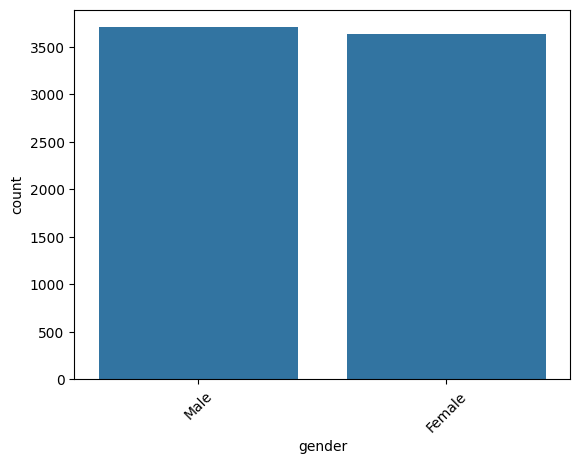

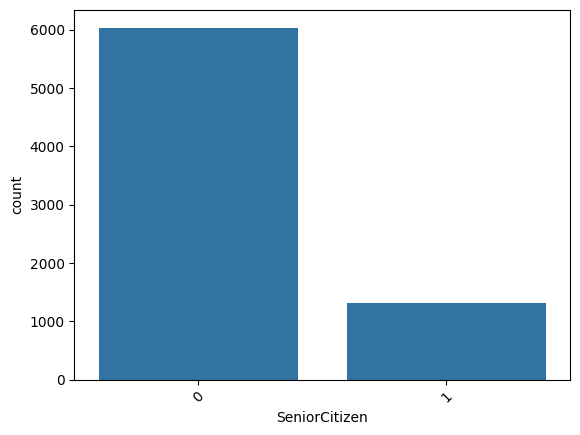

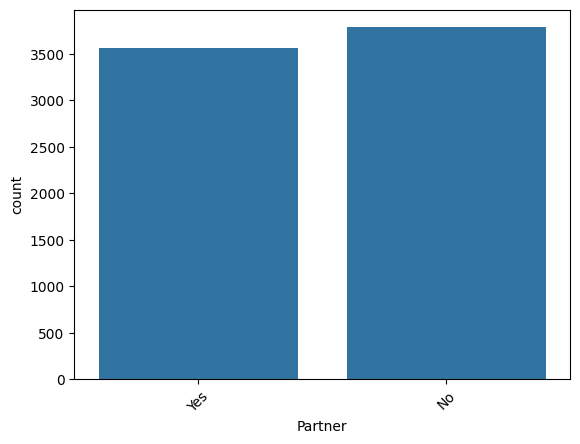

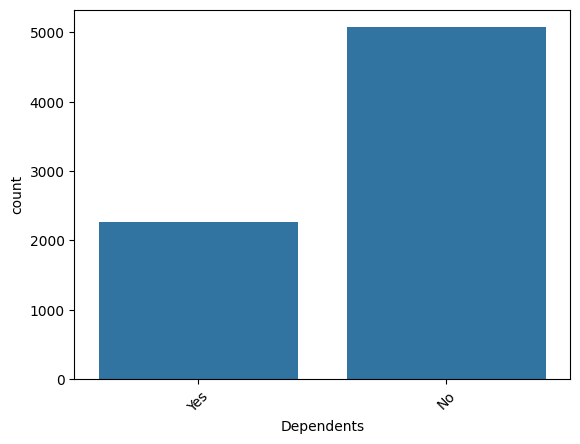

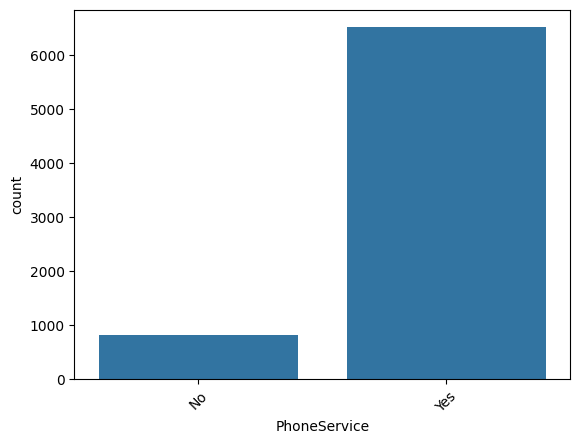

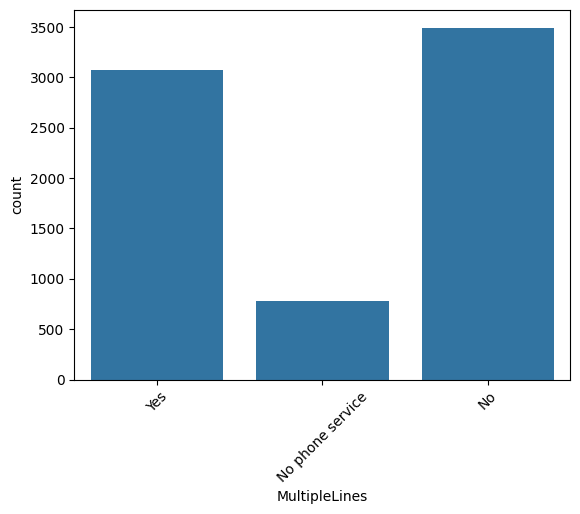

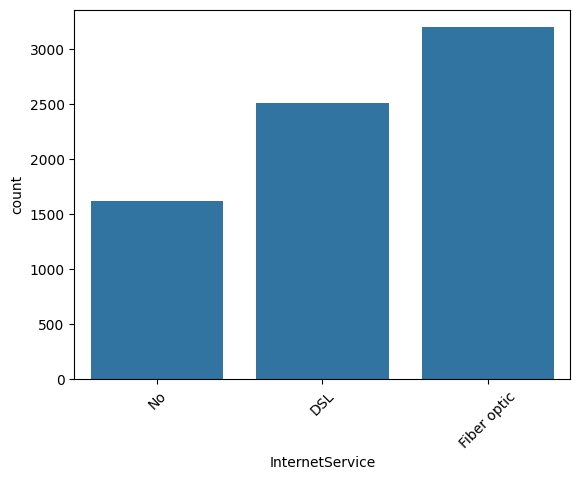

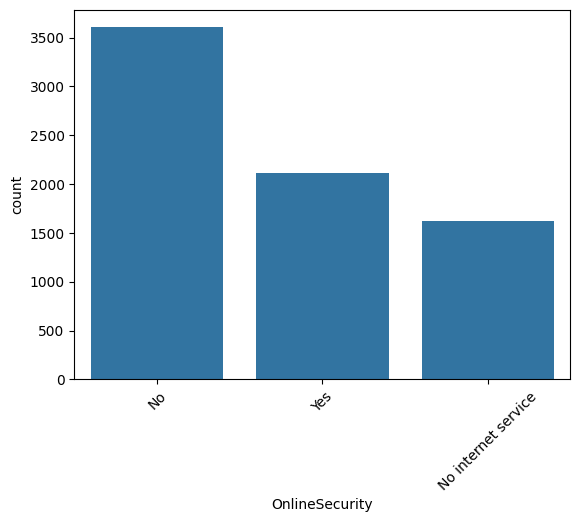

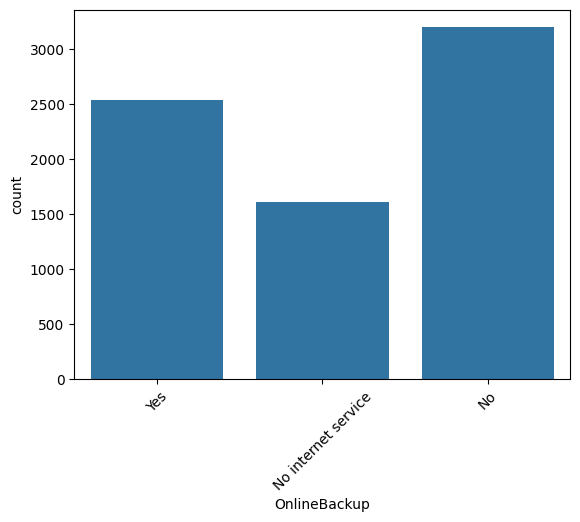

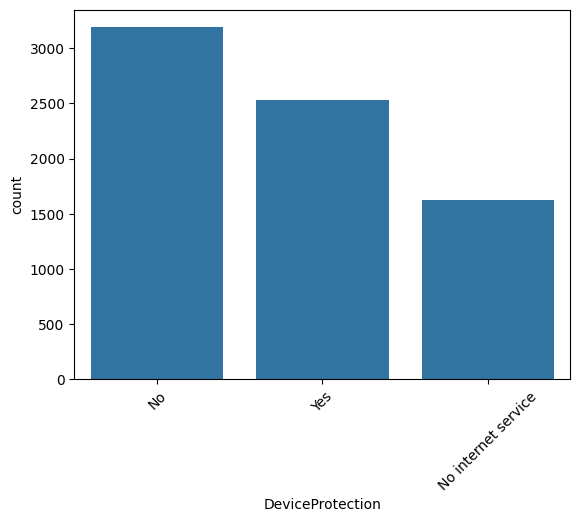

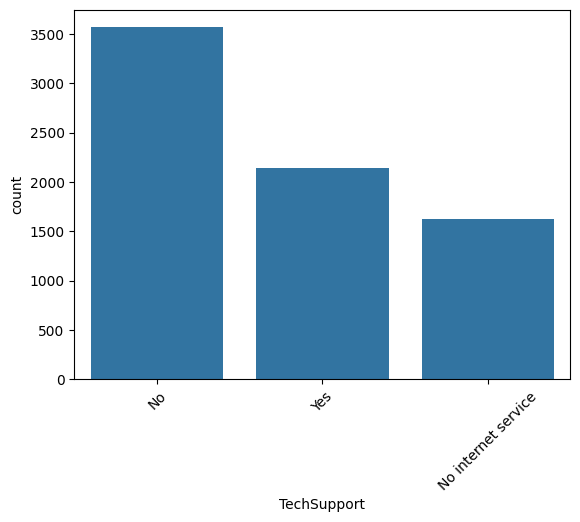

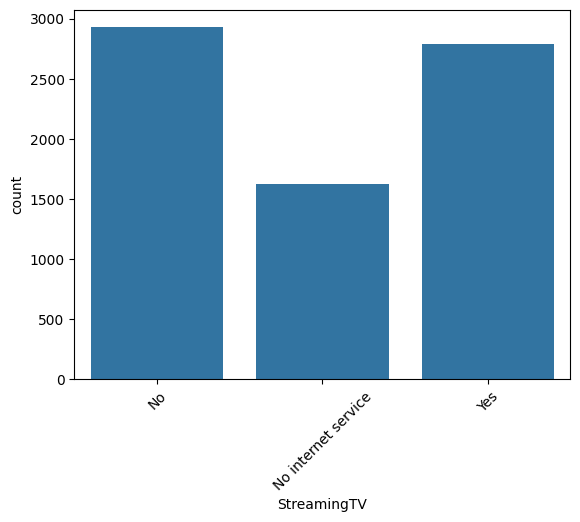

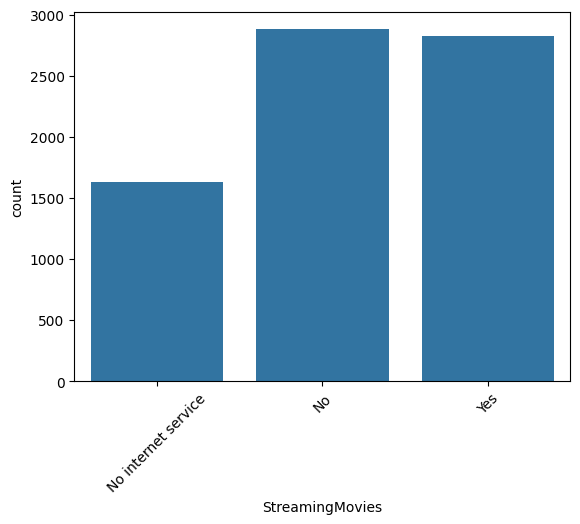

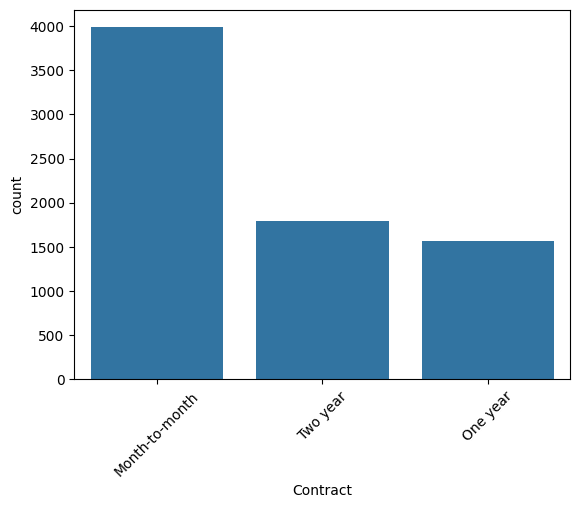

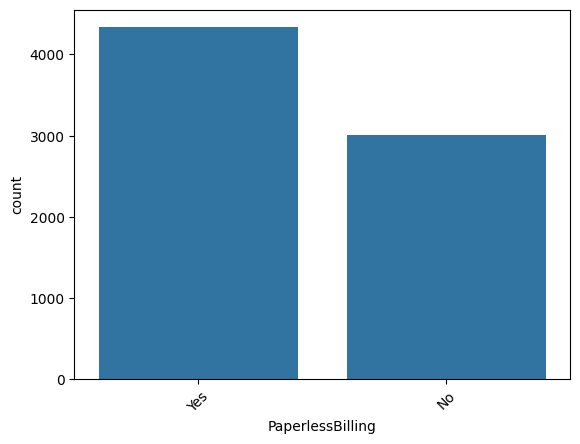

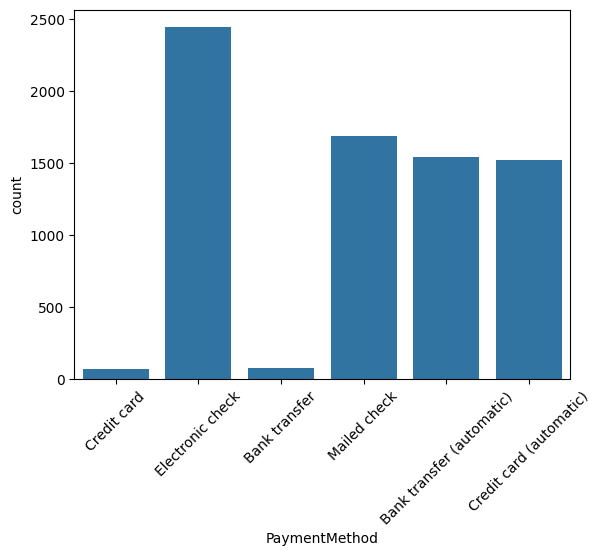

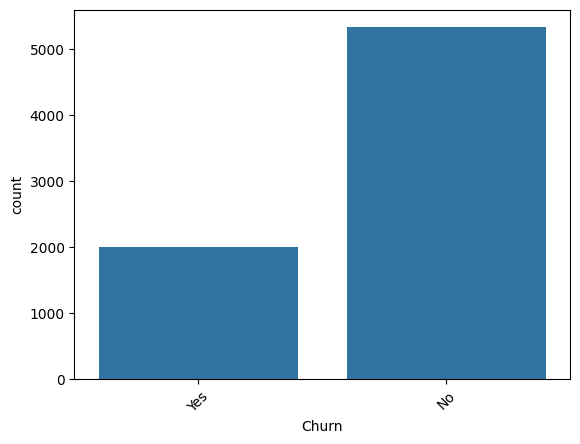

In [52]:
# Checking the distribution of the target variable "Churn" on categorical features

cat_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 
            'PhoneService', 'MultipleLines', 'InternetService', 
            'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
            'TechSupport', 'StreamingTV', 'StreamingMovies', 
            'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
for col in cat_cols:
    sns.countplot(x=col, data=df)
    plt.xticks(rotation=45)
    plt.show()

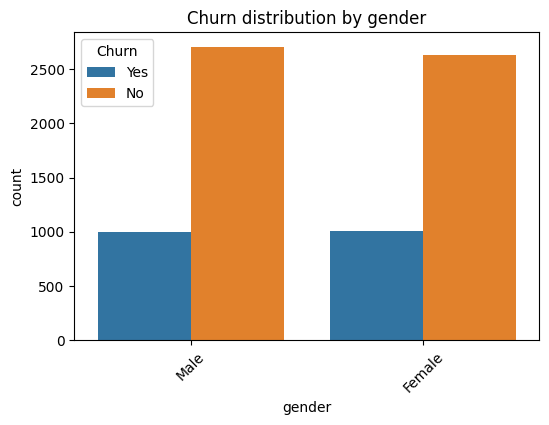

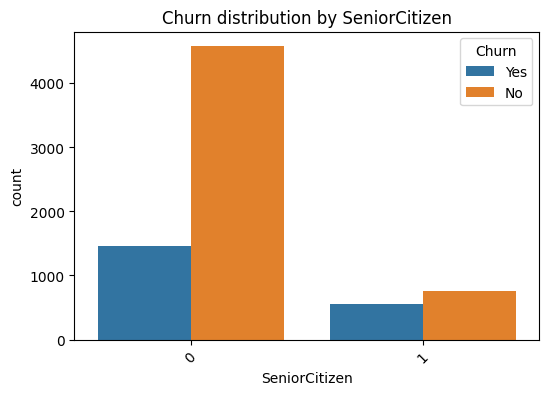

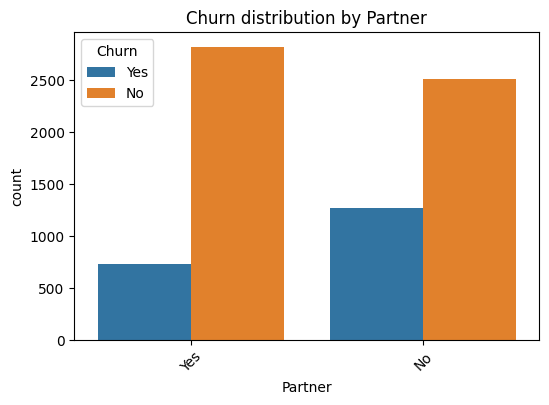

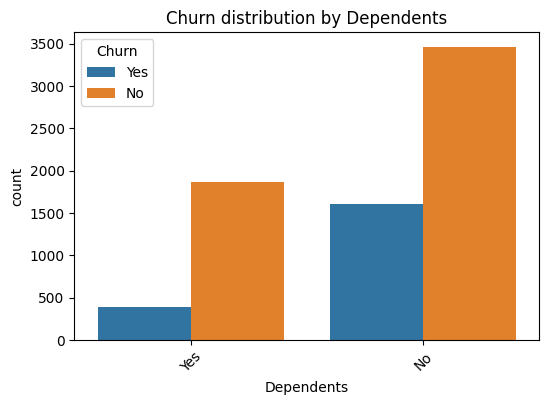

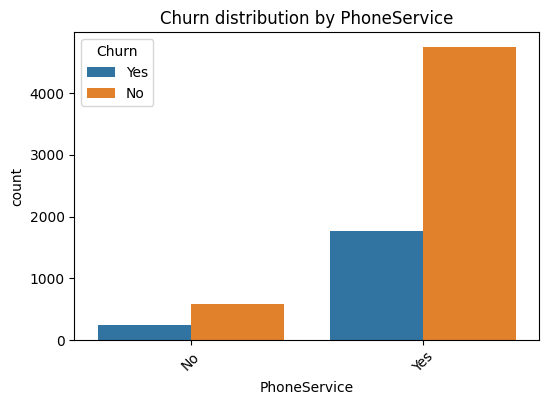

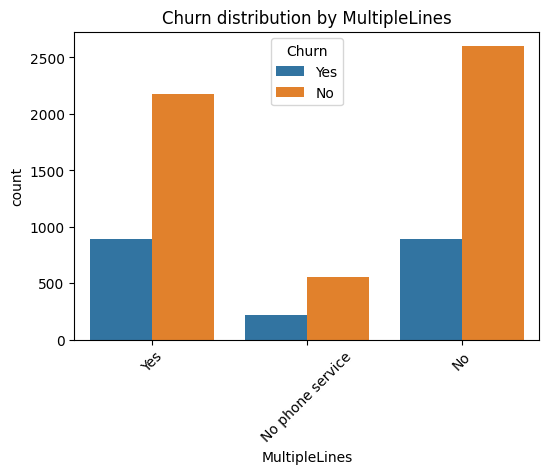

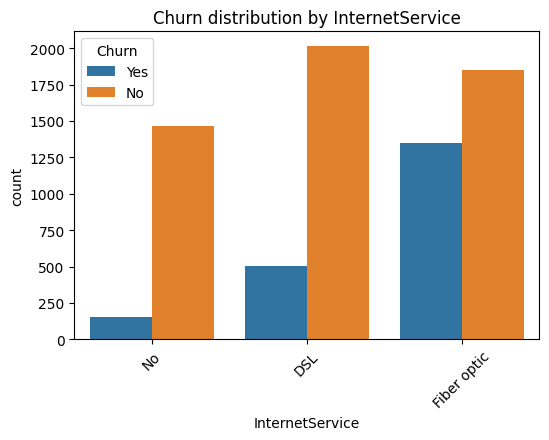

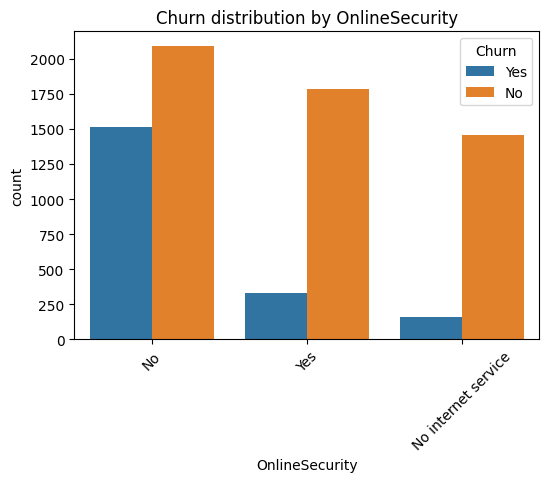

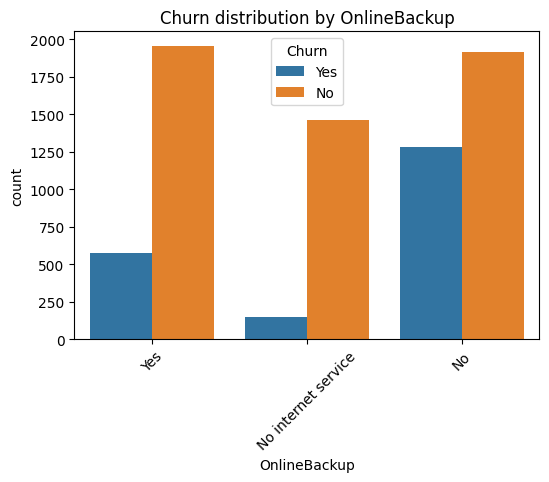

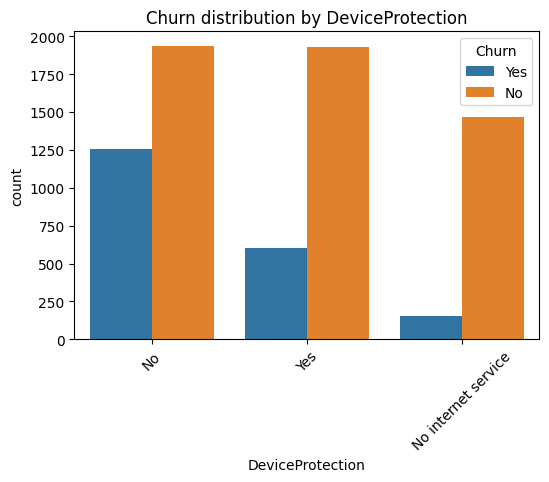

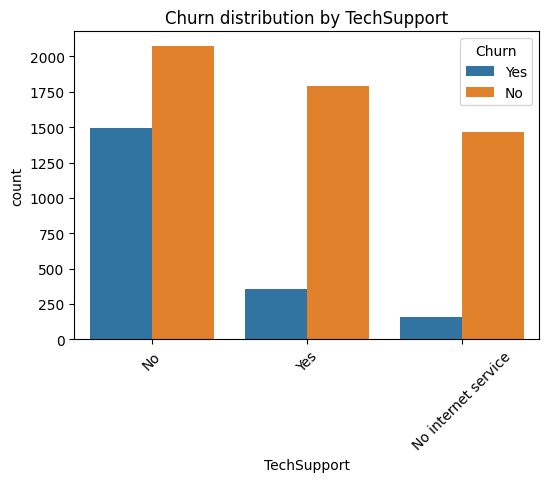

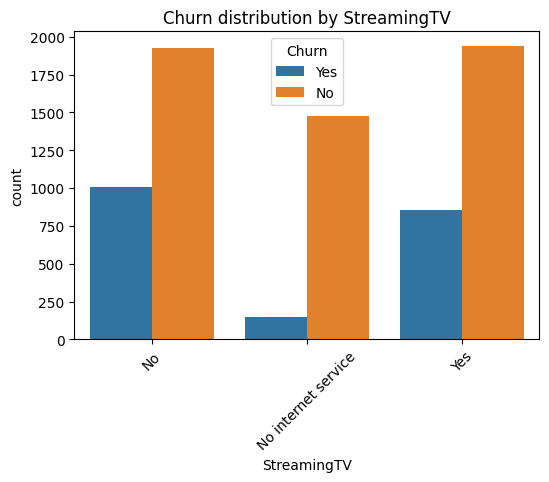

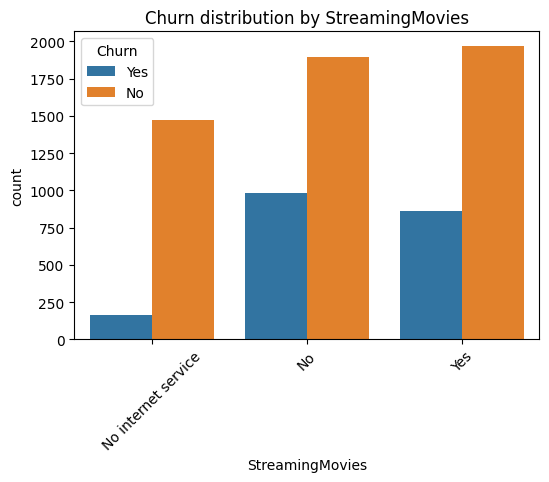

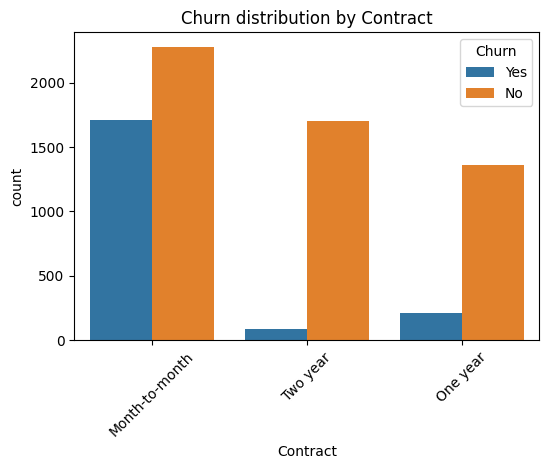

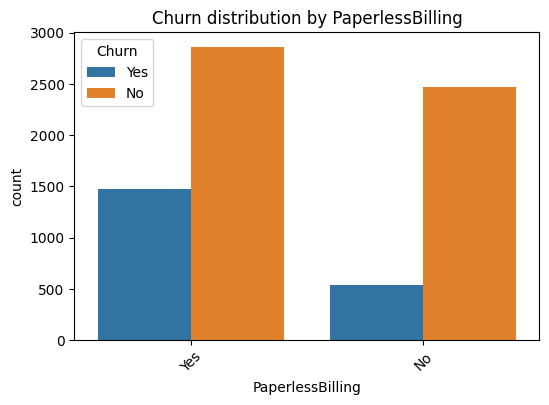

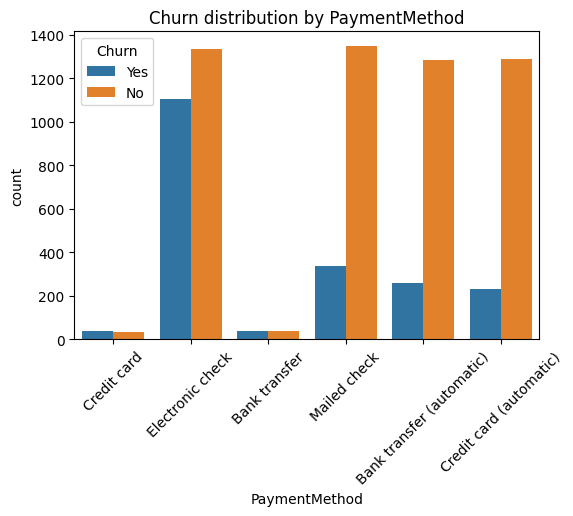

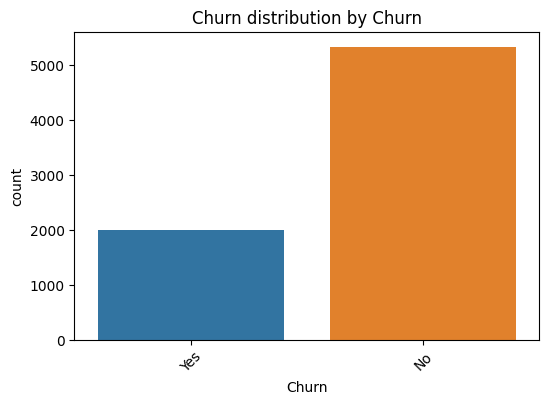

In [53]:
for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, hue="Churn", data=df)
    plt.title(f"Churn distribution by {col}")
    plt.xticks(rotation=45)
    plt.show()

## 7. Key Insights from Raw Data

### What Actually Matters:
- **Gender doesn't matter** - churn is about the same for males and females
- **Family status matters** - customers with partners/dependents churn less
- **Internet type is huge** - fiber optic customers churn way more than DSL
- **Contract length is critical** - month-to-month customers leave constantly
- **Payment method matters** - electronic check users churn more
- **Churn Distribution** - The dataset is imbalanced; significantly more customers stay than leave, which is common but important to note for model training

### What Doesn't Matter Much:
- Phone service (almost everyone has it)
- Paperless billing

## import Processed Dataset

In [54]:
processed_df = pd.read_csv('DATA/processed/clean_data.csv')
processed_df.head(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,1,0,1,1,5,0,2,2,0,2,0,0,0,1,0,1,2,27.43,1
1,0,0,0,0,42,1,1,0,2,2,0,0,1,1,2,0,4,38.28,1
2,1,0,0,0,61,1,1,2,0,2,0,2,2,0,1,0,0,106.44,1
3,1,1,0,1,22,1,0,2,1,1,2,0,1,2,0,0,4,92.49,0
4,1,1,1,1,21,0,0,0,0,0,1,0,0,1,1,0,0,19.63,1


In [55]:
print(processed_df.shape)

(7343, 19)


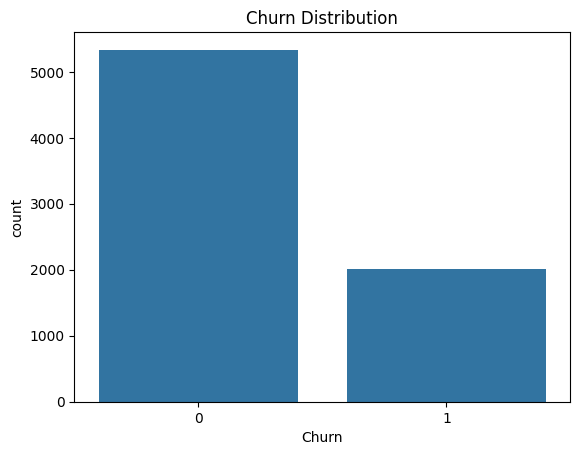

Churn
0    0.726542
1    0.273458
Name: proportion, dtype: float64


In [56]:
# Checking the distribution of the target variable "Churn"

sns.countplot(x="Churn", data=processed_df)
plt.title("Churn Distribution")
plt.show()

print(processed_df["Churn"].value_counts(normalize= True))

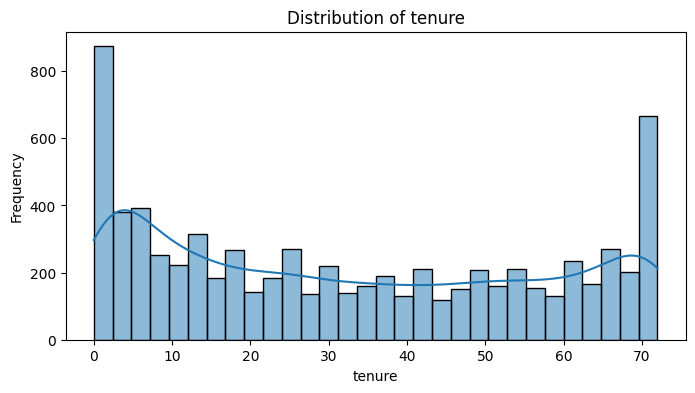

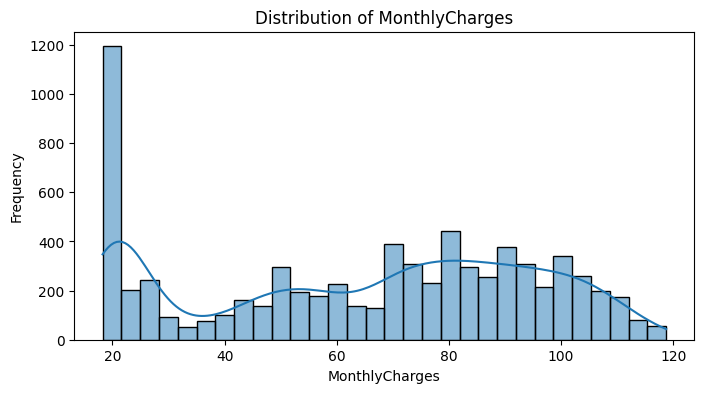

In [57]:
# Numerical Feature Distribution
# TotalCharges is removed becouse it highly correlated with MonthlyCharges and tenure

numerical_cols = ['tenure', 'MonthlyCharges']

for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(processed_df[col], kde=True, bins= 30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

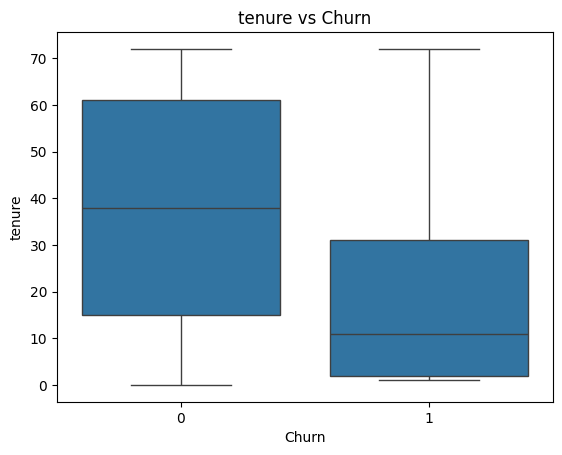

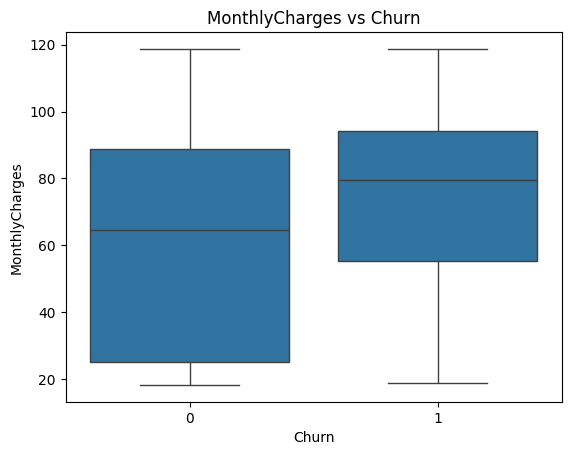

In [58]:
# Box plots to visualize the relationship between numerical features and Churn

for col in numerical_cols:
    sns.boxplot(x="Churn", y=col, data=processed_df)
    plt.title(f"{col} vs Churn")
    plt.show()


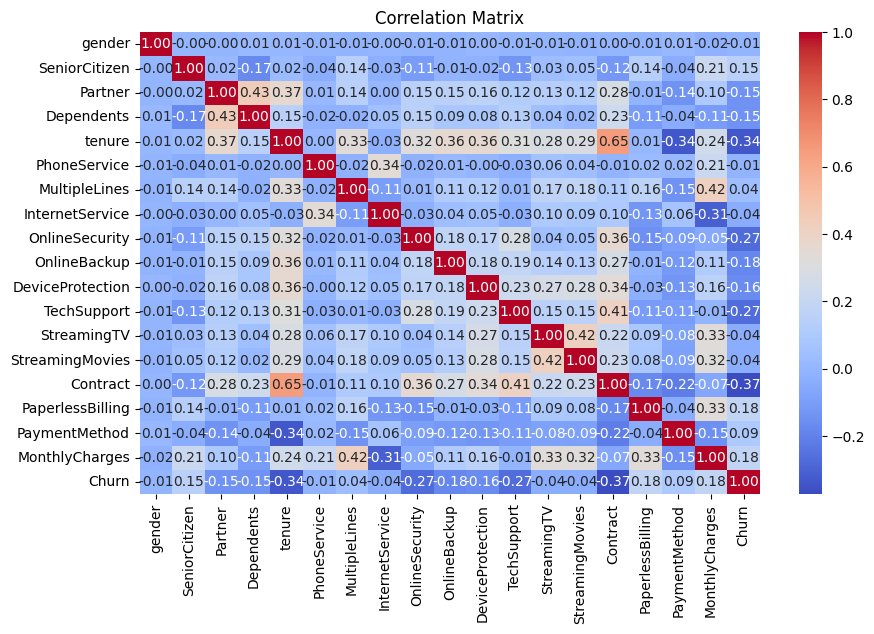

In [59]:
# Checking the correlation between numerical features and the target variable "Churn"

corr = processed_df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

### Key Insights from Processed Data
1. Churn is balanced (≈50/50 split), which is good for modeling.  
2. Tenure is an important predictor — churners usually have short tenure.  
3. MonthlyCharges influences churn — higher charges are linked to higher churn.  
4. TotalCarges is removed becouse it highly correlated with MonthlyCharges and tenure
5. No single feature fully explains churn, meaning a combination of features will be important in prediction.  

## 8. Insights from Processed Data

### 1. Why I Removed TotalCharges:
When I was cleaning the data, I found that TotalCharges was basically just MonthlyCharges multiplied by tenure (how long they've been a customer). This is called "multicollinearity" and it can mess up your machine learning models. So I decided to keep MonthlyCharges and tenure separately since they tell different stories.

### 2. Tenure Distribution - The Loyalty Story:
Looking at the tenure histogram, I can see that most customers are either very new (1-12 months) or very loyal (60+ months). There's this weird gap in the middle around 24-36 months. I'm not sure why this happens - maybe there's something about the 2-year contract that makes people leave after it expires?

### 2. Monthly Charges - The Price Sensitivity:
The MonthlyCharges distribution shows that most people pay between $40-$80 per month. But when I looked at the box plots comparing churn vs no churn, I saw that churners tend to pay higher monthly charges. This makes me think that price increases might be a big reason people leave.

### 3. Correlation Matrix - What Works Together:
The correlation heatmap was really helpful. I can see that tenure and churn have a negative correlation (longer tenure = less churn), which makes sense. MonthlyCharges and churn have a positive correlation (higher charges = more churn). But the correlations aren't super strong, which means I'll need to look at combinations of features, not just individual ones.


## 9. Next Steps for Modeling

Now that I understand the data better, I think the most important features for predicting churn will be:
1. **Tenure** - how long they've been a customer
2. **Contract type** - month-to-month vs longer terms
3. **Monthly charges** - how much they pay
4. **Internet service type** - fiber optic vs DSL
5. **Family status** - partner and dependents